<a href="https://colab.research.google.com/github/YuvarajCU/AI-ML-Task-Race-Gender-Age-detection/blob/main/AI_ML_Task_Race_Gender_Age_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##AI/ML Task: Race/Gender/Age detection
###Author: Yuvaraj C U
Greetings!
This is Yuvaraj C U and i'm interested for an intern role at your Company to learn and extend my contribution as fresher and as a fellow who loves your amazing product.
#####The following is a python incorporating transformer model to predict Race, Gender & ethnicity. Due to computational and dataset constraints the following is the best i could with my knowledge and experience. Though I regret i couldn't impress you with my little knowledge, I'm glad to learn through this task and hopefully as an intern at your company.

Questionnaire
Please complete the following questionnaire by rating your proficiency on a scale of 1-10 in the following areas:
Python - 7
Image Processing (Video) - 3
NLP - Text summarization, open-source LLM’s - 3
Sound Processing – Tone of voice, sentiment - 3
Transformer models - 5
Classification/Object Detection/Semantic Segmentation/Regression or any other DNN tasks - 6
Deep learning frameworks (Torch/TF, etc.) - 6

Thanks & Regards
####Yuvaraj C U



In [ ]:
!pip install transformers
!pip install tensorflow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from transformers import TFBertModel, BertTokenizer
from tensorflow.keras import layers, Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam


In [ ]:
# Load the dataset from Kaggle - https://www.kaggle.com/datasets/nipunarora8/age-gender-and-ethnicity-face-data-csv
df = pd.read_csv('/content/drive/MyDrive/Elevate AI/age_gender.csv')

df.head()
df.dropna(inplace=True)
df.shape

(23705, 5)

26     2197
1      1123
28      918
35      880
24      859
       ... 
115       3
101       2
91        2
111       1
103       1
Name: age, Length: 104, dtype: int64

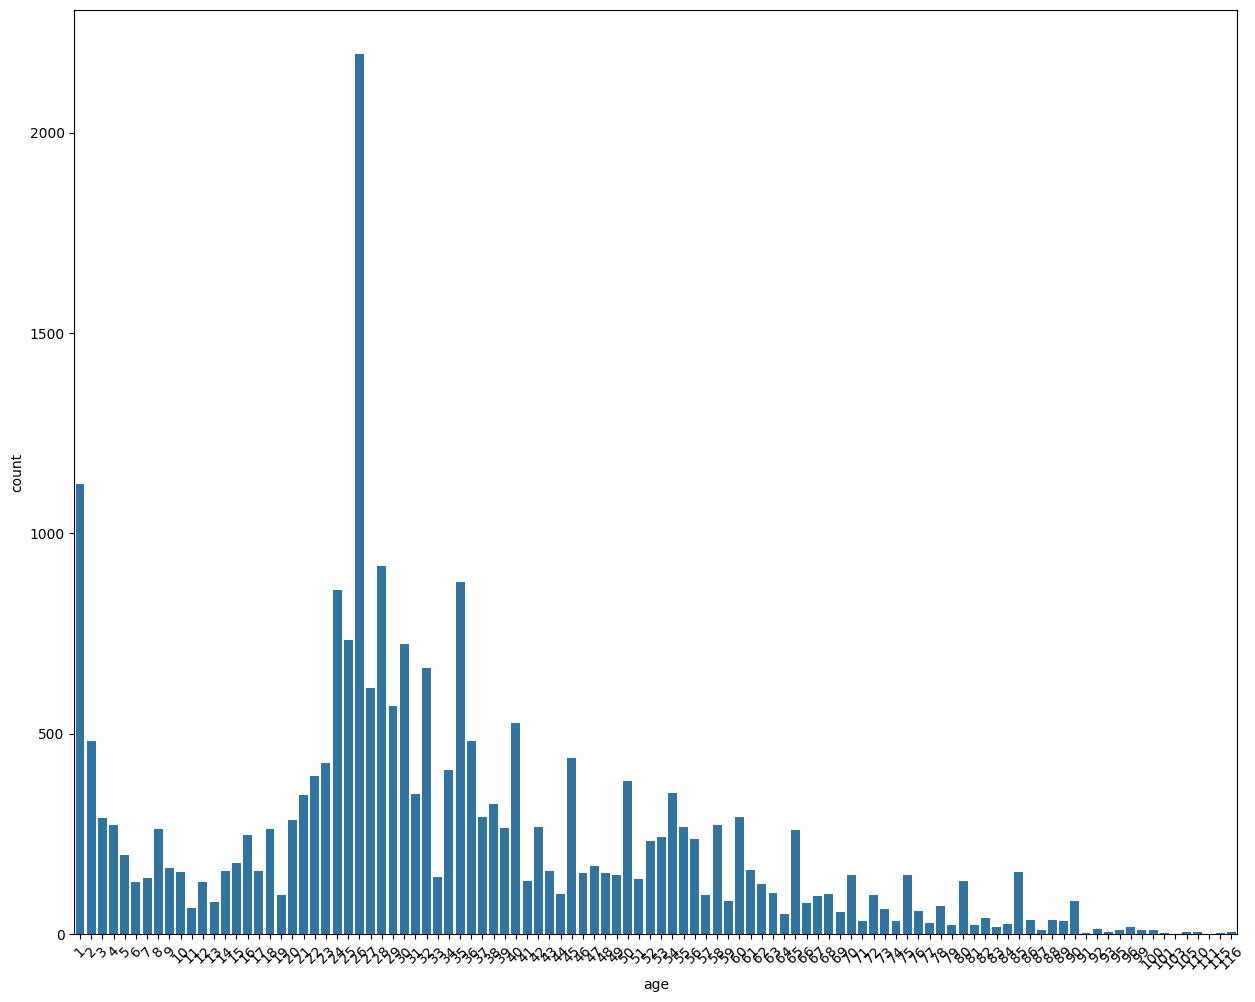

In [ ]:
# Visualize age distribution
plt.figure(figsize=(15, 12))
sns.countplot(data=df, x='age')
plt.xticks(rotation=45)

df['age'].value_counts()

0    10078
1     4526
3     3975
2     3434
4     1692
Name: ethnicity, dtype: int64

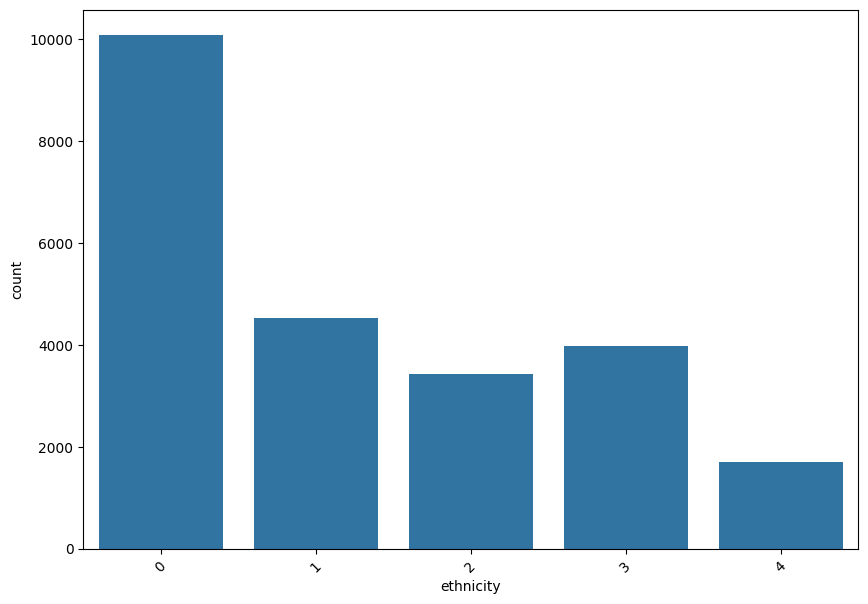

In [ ]:
# Visualize ethnicity distribution
plt.figure(figsize=(10, 7))
sns.countplot(data=df, x='ethnicity')
plt.xticks(rotation=45)

df['ethnicity'].value_counts()

0    12391
1    11314
Name: gender, dtype: int64

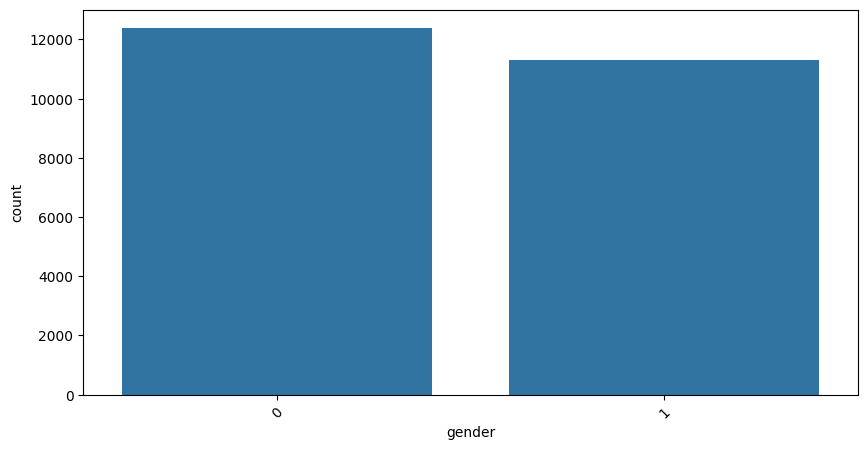

In [ ]:
# Visualize gender distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='gender')
plt.xticks(rotation=45)

df['gender'].value_counts()

In [ ]:
# Convert the 'pixels' column to NumPy array and normalize pixel values
df['pixels'] = df['pixels'].apply(lambda x: np.array(x.split(), dtype="float32") / 255.0)
df['pixels'][0]

array([0.5058824 , 0.5019608 , 0.5019608 , ..., 0.57254905, 0.57254905,
       0.57254905], dtype=float32)

In [ ]:
# Convert 'pixels' column to NumPy array
X = np.array(df['pixels'].tolist())

# Reshape the array to (-1, 48, 48, 1) for image data
X = X.reshape(-1, 48, 48, 1)

# Display the shape of X
X.shape

(23705, 48, 48, 1)

In [ ]:
# Display the shape of the first row
X[0].shape

(48, 48, 1)

Text(0.5, 0, 'Age:1  Ethnicity:2  Gender:0')

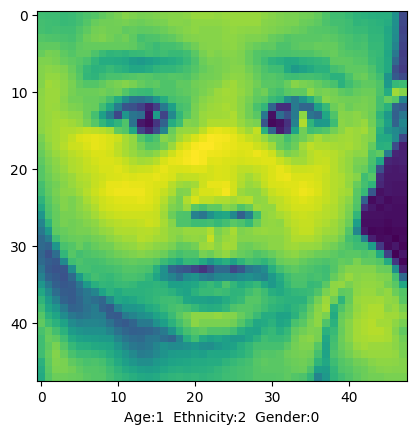

In [ ]:
# Display the image of the first row
plt.imshow(X[0])
plt.xlabel(
    "Age:" + str(df['age'].iloc[0]) +
    "  Ethnicity:" + str(df['ethnicity'].iloc[0]) +
    "  Gender:" + str(df['gender'].iloc[0])
)

In [ ]:
# Convert 'age' column to categorical labels
df["age"] = pd.cut(df["age"], bins=[0, 3, 18, 45, 64, 116], labels=["0", "1", "2", "3", "4"])
y_age = to_categorical(np.array(df['age']), num_classes=5)

In [ ]:
# Encode ethnicity labels
label_encoder_ethnicity = LabelEncoder()
df['encoded_ethnicity'] = label_encoder_ethnicity.fit_transform(df['ethnicity'])
y_ethnicity = to_categorical(df['encoded_ethnicity'], num_classes=len(label_encoder_ethnicity.classes_))

In [ ]:
# Encode gender labels
label_encoder_gender = LabelEncoder()
df['encoded_gender'] = label_encoder_gender.fit_transform(df['gender'])
y_gender = to_categorical(df['encoded_gender'], num_classes=len(label_encoder_gender.classes_))

In [ ]:
# Split the data
X = np.array(df['pixels'].tolist())
X = X.reshape(-1, 48, 48, 1)

X_train, X_test, y_train_age, y_test_age, y_train_gender, y_test_gender, y_train_ethnicity, y_test_ethnicity = train_test_split(
    X, y_age, y_gender, y_ethnicity, test_size=0.2, random_state=42
)

In [ ]:
# Tokenize input data using BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
# Tokenize X_train and X_test
X_train_tokens = tokenizer(list(map(str, X_train)), padding=True, truncation=True, return_tensors="tf", max_length=48)
X_test_tokens = tokenizer(list(map(str, X_test)), padding=True, truncation=True, return_tensors="tf", max_length=48)


In [ ]:
#Build Model
bert_model = TFBertModel.from_pretrained('bert-base-uncased')
bert_layers = bert_model.layers[0]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
# Age head
input_age = layers.Input(shape=(48,), dtype=tf.int32, name='input_age')
bert_output_age = bert_layers(input_age)[0][:, 0, :]
output_age = layers.Dense(5, activation='softmax', name='output_age')(bert_output_age)

In [ ]:
# Gender head
input_gender = layers.Input(shape=(48,), dtype=tf.int32, name='input_gender')
bert_output_gender = bert_layers(input_gender)[0][:, 0, :]
output_gender = layers.Dense(2, activation='softmax', name='output_gender')(bert_output_gender)


In [ ]:
# Ethnicity head
input_ethnicity = layers.Input(shape=(48,), dtype=tf.int32, name='input_ethnicity')
bert_output_ethnicity = bert_layers(input_ethnicity)[0][:, 0, :]
output_ethnicity = layers.Dense(len(label_encoder_ethnicity.classes_), activation='softmax', name='output_ethnicity')(bert_output_ethnicity)


In [ ]:
# Create the multi-task model
model = Model(inputs=[input_age, input_gender, input_ethnicity], outputs=[output_age, output_gender, output_ethnicity])


In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss={'output_age': 'categorical_crossentropy',
                    'output_gender': 'categorical_crossentropy',
                    'output_ethnicity': 'categorical_crossentropy'},
              metrics={'output_age': 'accuracy',
                       'output_gender': 'accuracy',
                       'output_ethnicity': 'accuracy'},
              loss_weights={'output_age': 1.0,
                            'output_gender': 1.0,
                            'output_ethnicity': 1.0})
model.summary()

In [ ]:
# Train the model
history = model.fit(
    {'input_age': X_train_tokens['input_ids'],
     'input_gender': X_train_tokens['input_ids'],
     'input_ethnicity': X_train_tokens['input_ids']},
    {'output_age': y_train_age, 'output_gender': y_train_gender, 'output_ethnicity': y_train_ethnicity},
    validation_data=({'input_age': X_test_tokens['input_ids'],
                      'input_gender': X_test_tokens['input_ids'],
                      'input_ethnicity': X_test_tokens['input_ids']},
                     {'output_age': y_test_age, 'output_gender': y_test_gender, 'output_ethnicity': y_test_ethnicity}),
    epochs=5,
    batch_size=32
)

In [ ]:
# Evaluate the model on the test set
eval_results = model.evaluate(
    {'input_age': X_test_tokens['input_ids'],
     'input_gender': X_test_tokens['input_ids'],
     'input_ethnicity': X_test_tokens['input_ids']},
    {'output_age': y_test_age, 'output_gender': y_test_gender, 'output_ethnicity': y_test_ethnicity},
    verbose=0
)

# Extract individual losses and accuracies
loss_age, accuracy_age = eval_results[1], eval_results[4]
loss_gender, accuracy_gender = eval_results[2], eval_results[5]
loss_ethnicity, accuracy_ethnicity = eval_results[3], eval_results[6]

print('Test Age Loss:', loss_age)
print('Test Age Accuracy:', accuracy_age)

print('Test Gender Loss:', loss_gender)
print('Test Gender Accuracy:', accuracy_gender)

print('Test Ethnicity Loss:', loss_ethnicity)
print('Test Ethnicity Accuracy:', accuracy_ethnicity)


Test Age Loss: 1.1754990816116333
Test Age Accuracy: 0.5842649340629578
Test Gender Loss: 0.6859937906265259
Test Gender Accuracy: 0.5473528504371643
Test Ethnicity Loss: 1.4021813869476318
Test Ethnicity Accuracy: 0.4351402521133423


In [ ]:
# Visualize training history (accuracy and loss)
plt.plot(history.history['output_age_accuracy'], label='Age Accuracy')
plt.plot(history.history['output_gender_accuracy'], label='Gender Accuracy')
plt.plot(history.history['output_ethnicity_accuracy'], label='Ethnicity Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['output_age_loss'], label='Age Loss')
plt.plot(history.history['output_gender_loss'], label='Gender Loss')
plt.plot(history.history['output_ethnicity_loss'], label='Ethnicity Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()